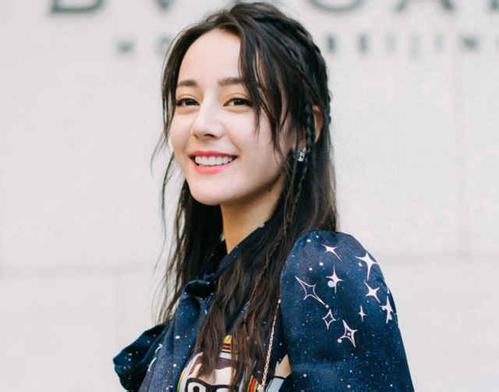

In [2]:
from PIL import Image
Image.open('../data/cnn_img/test.jpg')

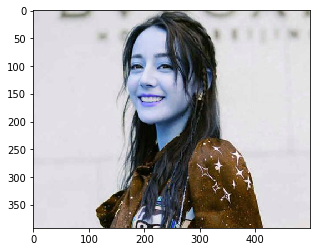

In [14]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
face_cascade = cv.CascadeClassifier('/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/cv2/data/haarcascade_frontalface_default.xml')
img = cv.imread('../data/cnn_img/test.jpg')
plt.imshow(img)

Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['box']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


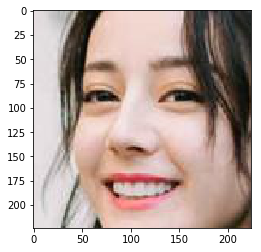

In [27]:
%pylab inline

faces = face_cascade.detectMultiScale(img, 1.3, 5)
im = Image.open('../data/cnn_img/test.jpg')
for (x,y,w,h) in faces:
    roi_color = img[y:y+h, x:x+w]
    box = (x, y, x+w, y+h)
    crpim = im.crop(box).resize((224,224))
    crpim.save('../data/cnn_img/test1.jpg')

plt.imshow(crpim)

In [ ]:
im = Image.open('../data/cnn_img/test.jpg')

In [ ]:
crpim = im.crop(box).resize((224,224))
plt.imshow(np.asarray(crpim))

In [19]:
im.
roi_color.resize((128,128))

ValueError: resize only works on single-segment arrays

In [18]:
roi_color.shape


(137, 137, 3)

In [44]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
face_cascade = cv.CascadeClassifier('/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/cv2/data/haarcascade_frontalface_default.xml')




def extractFace(filename, direction):
    img = cv.imread(filename)
    #plt.imshow(img)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    im = Image.open(filename)
    for (x,y,w,h) in faces:
        roi_color = img[y:y+h, x:x+w]
        box = (x, y, x+w, y+h)
        crpim = im.crop(box).resize((64,64))
        crpim.save(direction + filename)

In [43]:
#os.listdir(path)
os.listdir('binbin')

['u=2209833504,1856837795&fm=27&gp=0.jpg',
 'u=102615914,351810697&fm=27&gp=0.jpg',
 'u=3411907180,3535921849&fm=27&gp=0.jpg',
 'u=3797688823,1581331029&fm=27&gp=0.jpg',
 'u=3841668537,3513178317&fm=27&gp=0.jpg',
 'u=4280033128,953380218&fm=27&gp=0.jpg',
 'u=998808995,3053855327&fm=27&gp=0.jpg',
 'u=1429358539,2600606709&fm=27&gp=0.jpg',
 'u=4149709439,2262393022&fm=27&gp=0.jpg',
 'u=3485831248,1092414015&fm=27&gp=0.jpg',
 'u=860516670,2369045341&fm=27&gp=0.jpg',
 'u=2658524838,3261050120&fm=27&gp=0.jpg',
 'u=3795572388,441446426&fm=27&gp=0.jpg',
 'u=835808337,3497282967&fm=27&gp=0.jpg',
 'u=1352319138,672963154&fm=27&gp=0.jpg',
 'u=1057800731,1000306364&fm=27&gp=0.jpg',
 'u=3049862422,590163543&fm=27&gp=0.jpg',
 'u=1515493865,3525355831&fm=27&gp=0.jpg',
 'u=1365474080,633648758&fm=27&gp=0.jpg',
 'u=3207133889,1275421372&fm=27&gp=0.jpg',
 'u=3040546197,918656204&fm=27&gp=0.jpg',
 'u=914577625,1032683163&fm=27&gp=0.jpg',
 'u=2137930158,1159006563&fm=27&gp=0.jpg',
 'u=219827339,940147122

In [48]:
import os
#os.mkdir('binbin2/binbin')
path = 'binbin/'
for f in os.listdir(path):
    extractFace(path + f, 'binbin2/')

In [ ]:
def extractFace(filename, direction):
    faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
    image = cv2.imread(filename)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray, 1.05, 3, minSize = (100,100))
    
    filealt = filename.split('/')[1]

    im = Image.open(filename)
    i = 0
    for (x, y, w, h) in faces:
        filename = str(i) + filealt
        center_x = x+w/2
        center_y = y+h/2
        b_dim = min(max(w,h)*1.2,im.width, im.height) 
        box = (center_x-b_dim/2, center_y-b_dim/2, center_x+b_dim/2, center_y+b_dim/2)
        # Crop Image
        crpim = im.crop(box).resize((224,224))
        # Save Image
        crpim.save(direction + filename)
        i += 1